# Convolution & Discrete Fourier Transform

In [1]:
import utils
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

from skimage.color import rgb2gray
from scipy import fftpack
from scipy.signal import convolve2d
from skimage.util import random_noise
from skimage.exposure import rescale_intensity

%matplotlib inline

In [2]:
def get_image_from_freq(freq_domain_mat):
    # Inverse FFT is a fast version of inverse DFT
    inverse_fft_mat = fftpack.ifft2(freq_domain_mat) 
    
    # Due to approximations, the returned matrix contains complex numbers
    # So, we get the magnitude to be able to plot the image
    return np.abs(inverse_fft_mat) 

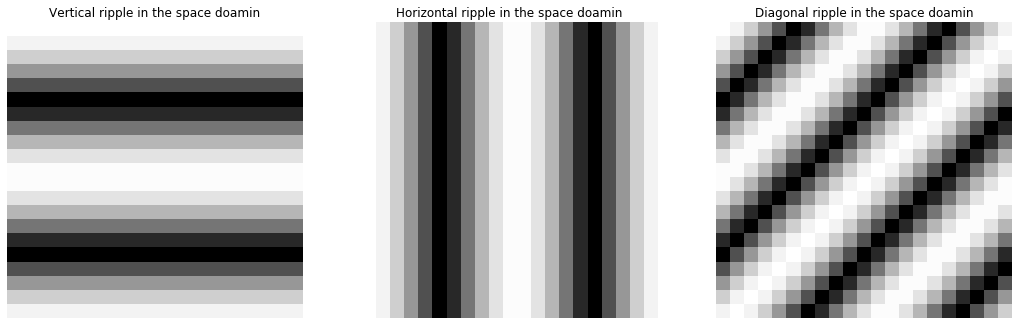

In [3]:
# a matrix in the frequency domain that makes a vertically moving ripple in the space domain
freq_domain_vertical_mat = np.zeros([21,21])
freq_domain_vertical_mat[9, 10] = 1 # The choice of the value '1' is arbitrary
freq_domain_vertical_mat[11, 10] = 1
vertical_ripple = get_image_from_freq(freq_domain_vertical_mat)

# a matrix in the frequency domain that makes a horizontally moving ripple in the space domain
freq_domain_horizontal_mat = np.zeros([21,21])
freq_domain_horizontal_mat[10, 9] = 1
freq_domain_horizontal_mat[10, 11] = 1
horizontal_ripple = get_image_from_freq(freq_domain_horizontal_mat)

# a ripple moving diagonally
freq_domain_diagonal_mat = np.zeros([21,21])
freq_domain_diagonal_mat[9, 9] = 1
freq_domain_diagonal_mat[11, 11] = 1
diagonal_ripple = get_image_from_freq(freq_domain_diagonal_mat)

# plot images
utils.show_images([vertical_ripple, horizontal_ripple, diagonal_ripple], 
                  ['Vertical ripple in the space doamin', 'Horizontal ripple in the space doamin',
                   'Diagonal ripple in the space doamin'])



In [4]:
def get_image_from_freq(img_in_freq):
    return fftpack.fftshift(np.log(np.abs(img_in_freq)+1))

In [5]:
def apply_filter(img, filter):
    '''
    This function applies a filter to an image in the frequency domain
    and plots multiple images describing the process
    '''
    
    img_in_freq = fftpack.fft2(img)
    filter_in_freq = fftpack.fft2(filter, img.shape)
    
    filtered_img_in_freq = np.multiply(img_in_freq, filter_in_freq)
    filtered_img = get_image_from_freq(filtered_img_in_freq)
    
    # plot images
    utils.show_images([img,
                       fftpack.fftshift(np.log(np.abs(img_in_freq)+1)),     # log for better intensity scale, shift to make zero freq at center
                       fftpack.fftshift(np.log(np.abs(filter_in_freq)+1)),
                       fftpack.fftshift(np.log(np.abs(filtered_img_in_freq)+1)),
                       filtered_img
                      ], 
                      ['Image', 'Image in Freq. Domain', 'Filter in Freq. Domain', 'Filtered Image in Freq. Domain', 'Filtered Image']
                      )

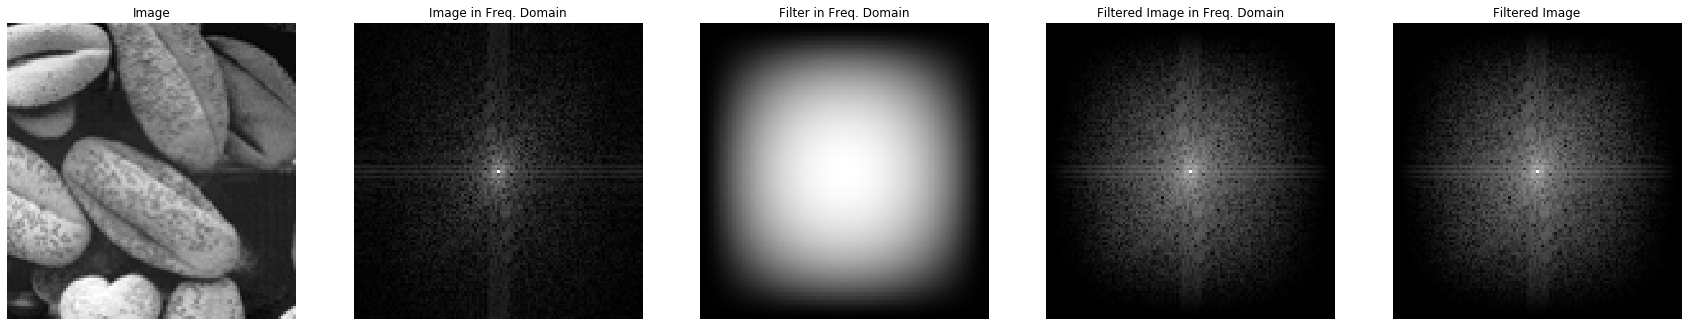

In [6]:
img = rgb2gray(io.imread('./images/picture2.png'))

low_pass_filter = np.array([
                            [1,2,1],
                            [2,4,2],
                            [1,2,1]
                            ])

apply_filter(img, low_pass_filter)

You can notice that using a low pass filter caused a blurring effect and noise is removed.

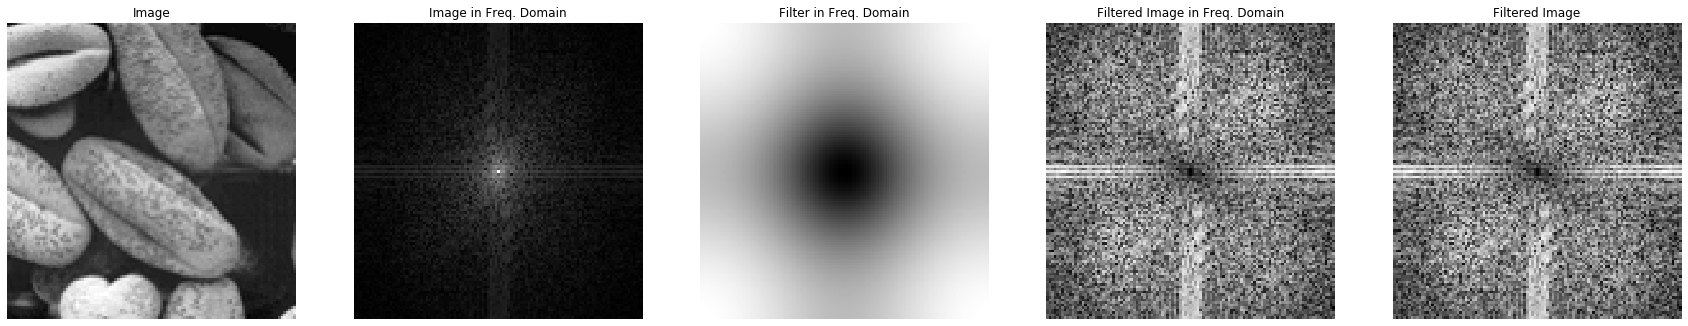

In [7]:
high_pass_filter =np.array([
    [ 0,-1, 0],
    [-1, 4,-1],
    [ 0,-1, 0]
])

apply_filter(img, high_pass_filter)

Using a high pass filter removed the image and kept noise only.

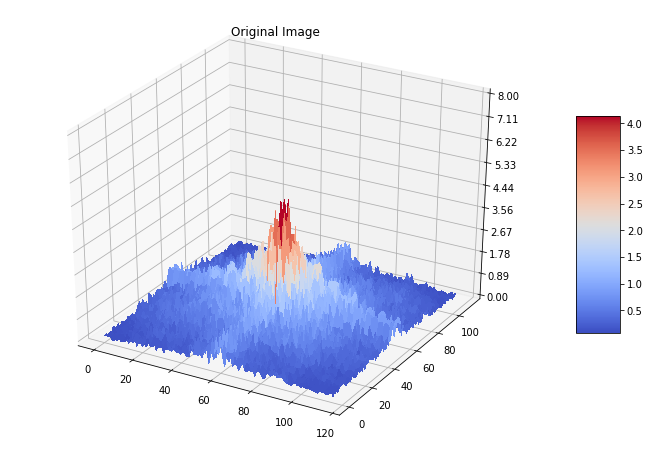

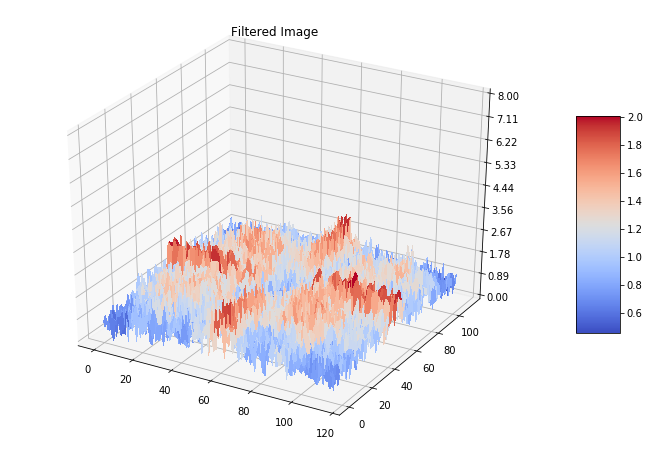

In [8]:
utils.show_3d_image_filtering_in_freq(img, high_pass_filter)

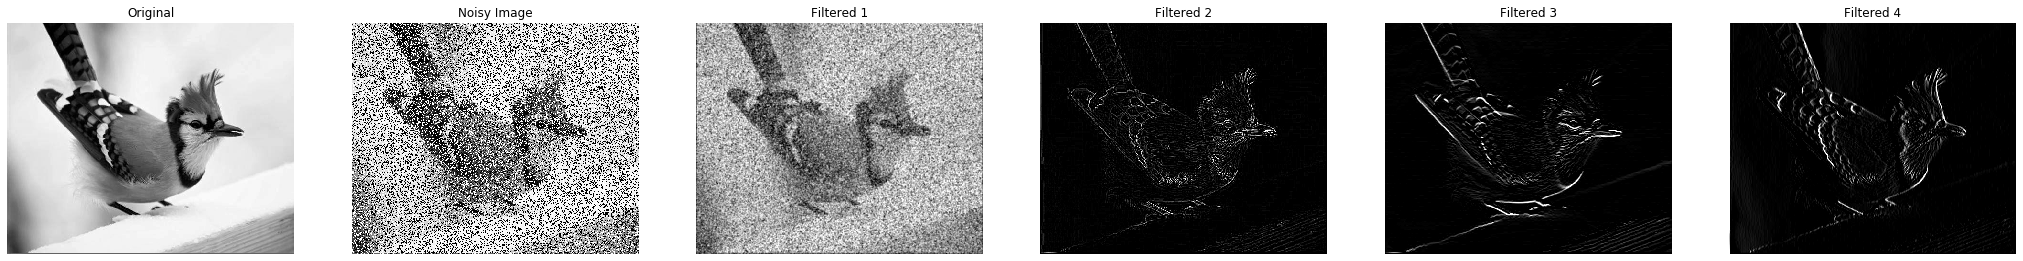

In [9]:
img = rgb2gray(io.imread('./images/bird.jpg'))

noisy_img = random_noise(img, mode='s&p', amount=0.5)


f1 = 1/9 * np.ones([3,3])

f2 = np.array([
    [1,1,1],
    [1,-8,1],
    [1,1,1]
])

f3 = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])
                     
f4 = np.array([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
])

# Convolve the noisy image with the filters
img_f1 = convolve2d(noisy_img, f1)
img_f2 = convolve2d(img, f2)
img_f3 = convolve2d(img, f3)
img_f4 = convolve2d(img, f4)


# Show the images
utils.show_images(
    [rescale_intensity(x, in_range=(0.0,1.0), out_range=(0, 255)) for x in [img,noisy_img, img_f1,img_f2,img_f3,img_f4]],
    ['Original','Noisy Image', 'Filtered 1','Filtered 2','Filtered 3','Filtered 4']
    )